# Análisis Conjunto. 
## Unión de los tres datasets trabajados, análisis estadístico y de correlaciones, selección de características

## Unión de los tres datasets y análisis

In [1]:
#Importamos las librerías que vamos a usar para los distintos pasos del problema

import numpy as np
import pandas as pd
from numpy import set_printoptions
#Visualización
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
#Preprocesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer
#Remuestreo
from sklearn.model_selection import train_test_split;
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#Algoritmos de Regresión Lineal
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
#Algoritmos de Regresión No Lineal
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
#Métricas de evaluación de algoritmos
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#Ensamblamiento Clasificación 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
#Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


### Carga del dataset trabajado de calidad del aire en Madrid

In [2]:
#cargamos datos de contaminacion de madrid  
dfContaminacion= pd.read_csv('../datosContaminacionMadrid/JupiterNoteBook/contaminacionMadrid2018_2019_2020.csv' , sep=';', delimiter=None, header='infer', names=None, index_col=None,)


In [3]:
dfContaminacion['date'] = pd.to_datetime(dfContaminacion['date'], format='%Y-%m-%d')
dfContaminacion=dfContaminacion.set_index('date')
dfContaminacion.index.rename('fecha', inplace=True)
dfContaminacion.head

<bound method NDFrame.head of             pm10  pm25    o3   no2  so2
fecha                                  
2018-01-01   8.0  21.0  27.0  15.0  2.5
2018-01-02   8.5  20.0  15.5  18.0  8.5
2018-01-03   8.0  30.5  14.5  16.0  4.0
2018-01-04   5.0  27.0  17.5  16.5  1.0
2018-01-05   3.0  16.5  28.0  14.5  1.0
...          ...   ...   ...   ...  ...
2020-12-27   6.0  42.5  26.0   9.0  1.0
2020-12-28   8.0  15.0  17.0  13.0  2.5
2020-12-29   5.0  17.0  29.0  12.0  1.0
2020-12-30   8.0  15.0  24.0  15.0  1.0
2020-12-31   4.0  27.0  29.0   8.0  1.0

[1095 rows x 5 columns]>

In [4]:
#de momento sacamos 2018 y 2019
dfContaminacion_18_19 = dfContaminacion['2018':'2019']
dfContaminacion_18_19.head

<bound method NDFrame.head of             pm10  pm25    o3   no2  so2
fecha                                  
2018-01-01   8.0  21.0  27.0  15.0  2.5
2018-01-02   8.5  20.0  15.5  18.0  8.5
2018-01-03   8.0  30.5  14.5  16.0  4.0
2018-01-04   5.0  27.0  17.5  16.5  1.0
2018-01-05   3.0  16.5  28.0  14.5  1.0
...          ...   ...   ...   ...  ...
2019-12-26  13.5  57.0  10.0  28.0  8.0
2019-12-27  24.0  35.5   5.0  33.5  8.5
2019-12-28  18.5  64.0   9.0  31.5  4.5
2019-12-29  15.5  55.0  30.0  15.5  3.0
2019-12-31  35.5  39.5   5.0  28.5  4.0

[729 rows x 5 columns]>

### Carga del dataset trabajado de meterología en Madrid

In [5]:
#cargamos dataframe meteo madrid y ponemos campo fecha como indice
df_estacion_datos_diarios = pd.read_csv('../AreaMeteo/df_sinhoras_estacion_datos_diarios_mad.csv')
df_estacion_datos_diarios['fecha'] = pd.to_datetime(df_estacion_datos_diarios['fecha'], format='%Y-%m-%d')
df_estacion_datos_diarios=df_estacion_datos_diarios.set_index('fecha')

#df_estacion_datos_diarios['fecha']=pd.to_datetime(df_estacion_datos_diarios["fecha"], format='%Y-%m-%d', errors='coerce')
#df_estacion_datos_diarios['fecha'] = pd.DatetimeIndex(df_estacion_datos_diarios['fecha']).date

In [6]:
print(df_estacion_datos_diarios.columns)
df_estacion_datos_diarios.head

Index(['indicativo', 'nombre', 'provincia', 'altitud', 'tmed', 'prec', 'tmin',
       'tmax', 'dir', 'velmedia', 'racha', 'sol', 'presmax', 'presmin',
       'month', 'week', 'year', 'season', 'season_name'],
      dtype='object')


<bound method NDFrame.head of            indicativo                        nombre provincia  altitud  tmed  \
fecha                                                                          
2018-01-01       3196        MADRID, CUATRO VIENTOS    MADRID    690.0   6.2   
2018-01-02       3196        MADRID, CUATRO VIENTOS    MADRID    690.0   9.4   
2018-01-03       3196        MADRID, CUATRO VIENTOS    MADRID    690.0  10.9   
2018-01-04       3196        MADRID, CUATRO VIENTOS    MADRID    690.0  11.3   
2018-01-05       3196        MADRID, CUATRO VIENTOS    MADRID    690.0   8.2   
...               ...                           ...       ...      ...   ...   
2019-12-27      3194U  MADRID, CIUDAD UNIVERSITARIA    MADRID    664.0   7.6   
2019-12-28      3194U  MADRID, CIUDAD UNIVERSITARIA    MADRID    664.0   7.2   
2019-12-29      3194U  MADRID, CIUDAD UNIVERSITARIA    MADRID    664.0   6.9   
2019-12-30      3194U  MADRID, CIUDAD UNIVERSITARIA    MADRID    664.0   5.7   
2019-12-31

In [7]:
#queremos 1 medina para la ciudad de madrid. hacemos drop las columnas que identifican el nombre de la estacion o relativas a la fecha. Nos quedamos solo con los valores
df_Meteo_Mad=df_estacion_datos_diarios.drop(columns=['altitud','provincia','indicativo','nombre', 'month', 'week' ,'year' ,'season','season_name'])
print(df_Meteo_Mad)

            tmed  prec  tmin  tmax   dir  velmedia  racha  sol  presmax  \
fecha                                                                     
2018-01-01   6.2   0.0   1.5   1.5  26.0      5.30  11.90  5.9   952.20   
2018-01-02   9.4   0.0   5.5   5.5  29.0      4.20  11.90  7.0   952.20   
2018-01-03  10.9   0.0   7.2   7.2  26.0      5.30  10.30  4.6   952.90   
2018-01-04  11.3   0.0   8.3   8.3  25.0      4.70  10.30  5.8   949.80   
2018-01-05   8.2  13.6   5.1   5.1  22.0      5.30  12.50  1.6   941.00   
...          ...   ...   ...   ...   ...       ...    ...  ...      ...   
2019-12-27   7.6   0.0  -0.4  -0.4   5.0      0.80   6.10  8.4   951.45   
2019-12-28   7.2   0.0  -2.3  -2.3  21.0      0.60   4.15  9.0   950.75   
2019-12-29   6.9   0.0  -1.9  -1.9  67.0      0.80   3.75  9.0   952.25   
2019-12-30   5.7   0.0  -2.0  -2.0  14.0      0.70   4.20  8.9   952.95   
2019-12-31   6.0   0.0  -1.5  -1.5  21.0      0.55   3.10  8.7   953.10   

            presmin  
fe

In [8]:
df_Meteo_Mad= df_Meteo_Mad.resample('D').median()
df_Meteo_Mad.head

<bound method NDFrame.head of             tmed  prec  tmin  tmax   dir  velmedia  racha  sol  presmax  \
fecha                                                                     
2018-01-01   6.9   0.0   1.7   1.7  26.0      3.10  10.00  5.9   953.25   
2018-01-02  10.4   0.0   6.3   6.3  29.0      2.80  11.90  7.0   953.25   
2018-01-03  10.9   0.0   7.2   7.2  23.0      1.70   8.60  4.6   954.15   
2018-01-04  11.3   0.0   7.9   7.9  25.0      2.20   7.80  5.8   951.55   
2018-01-05   8.2  13.6   5.2   5.2  22.0      3.10  11.70  1.6   942.35   
...          ...   ...   ...   ...   ...       ...    ...  ...      ...   
2019-12-27   8.9   0.0   2.5   2.5   5.0      0.80   6.10  8.4   951.45   
2019-12-28   8.2   0.0   2.0   2.0  21.0      0.60   4.15  9.0   950.75   
2019-12-29   7.8   0.0   2.0   2.0  67.0      0.80   3.75  9.0   952.25   
2019-12-30   7.0   0.0   1.5   1.5  14.0      0.70   4.20  8.9   952.95   
2019-12-31   6.8   0.0   1.5   1.5  21.0      0.55   3.10  8.7   953.1

### Carga del dataset trabajado de tráfico en Madrid

In [9]:
#cargamos datos de trafico de madrid 
dftrafico= pd.read_csv('../Tráfico/Madrid/trafico_mad.csv' , sep=',', delimiter=None, header='infer', names=None, index_col=None,)
dftrafico['fecha'] = pd.to_datetime(dftrafico['fecha'], format='%Y-%m-%d')
dftrafico.head

<bound method NDFrame.head of           fecha  intensidad  ocupacion  carga
0    2018-01-01       131.0        1.0    9.5
1    2018-01-02       256.5        3.0   20.0
2    2018-01-03       272.5        4.0   21.5
3    2018-01-04       284.0        4.0   22.0
4    2018-01-05       272.0        4.0   21.0
...         ...         ...        ...    ...
1091 2020-12-27       121.0        1.0    8.5
1092 2020-12-28       217.5        3.0   16.0
1093 2020-12-29       226.0        3.0   16.5
1094 2020-12-30       232.0        3.0   17.0
1095 2020-12-31       158.5        2.0   11.0

[1096 rows x 4 columns]>

In [10]:
dftrafico.dtypes

fecha         datetime64[ns]
intensidad           float64
ocupacion            float64
carga                float64
dtype: object

In [11]:
#tenemos datos de 2018,2019 y 2020 en el csv.
#tenemos que quedarnos solo con las filas de 2018 y 2019
dftrafico['year'] = pd.DatetimeIndex(dftrafico['fecha']).year
años=['2020']
# ~dftrafico['year'].isin(años) para "not in" // dftrafico['year'].isin(años) para "isin"
dftrafico_18_19 =dftrafico[~dftrafico['year'].isin(años)]
dftrafico_18_19.shape

(730, 5)

In [12]:
dftrafico_18_19=dftrafico_18_19.set_index('fecha')
dftrafico_18_19.index.rename('fecha', inplace=True)
dftrafico_18_19=dftrafico_18_19[['intensidad','ocupacion','carga']]
dftrafico_18_19.head

<bound method NDFrame.head of             intensidad  ocupacion  carga
fecha                                   
2018-01-01      131.00        1.0    9.5
2018-01-02      256.50        3.0   20.0
2018-01-03      272.50        4.0   21.5
2018-01-04      284.00        4.0   22.0
2018-01-05      272.00        4.0   21.0
...                ...        ...    ...
2019-12-27      252.00        3.0   19.0
2019-12-28      168.00        2.0   12.5
2019-12-29      145.25        2.0   10.5
2019-12-30      245.50        3.0   18.5
2019-12-31      174.00        2.0   13.0

[730 rows x 3 columns]>

### Unión de los tres datasets para tener datos de Calidad, Meteo y Tráfico en Barcelona conjuntamente

In [13]:
dfMergeado = pd.merge(dfContaminacion_18_19, df_Meteo_Mad, left_index=True, right_index=True)
dfMergeado = pd.merge(dfMergeado, dftrafico_18_19, left_index=True, right_index=True)
print(dfMergeado)

            pm10  pm25    o3   no2  so2  tmed  prec  tmin  tmax   dir  \
fecha                                                                   
2018-01-01   8.0  21.0  27.0  15.0  2.5   6.9   0.0   1.7   1.7  26.0   
2018-01-02   8.5  20.0  15.5  18.0  8.5  10.4   0.0   6.3   6.3  29.0   
2018-01-03   8.0  30.5  14.5  16.0  4.0  10.9   0.0   7.2   7.2  23.0   
2018-01-04   5.0  27.0  17.5  16.5  1.0  11.3   0.0   7.9   7.9  25.0   
2018-01-05   3.0  16.5  28.0  14.5  1.0   8.2  13.6   5.2   5.2  22.0   
...          ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   
2019-12-26  13.5  57.0  10.0  28.0  8.0  10.3   0.0   5.0   5.0   2.5   
2019-12-27  24.0  35.5   5.0  33.5  8.5   8.9   0.0   2.5   2.5   5.0   
2019-12-28  18.5  64.0   9.0  31.5  4.5   8.2   0.0   2.0   2.0  21.0   
2019-12-29  15.5  55.0  30.0  15.5  3.0   7.8   0.0   2.0   2.0  67.0   
2019-12-31  35.5  39.5   5.0  28.5  4.0   6.8   0.0   1.5   1.5  21.0   

            velmedia  racha  sol  presmax  presmin

Eliminamos columnas innecesarias ('pm25','o3','so2' de contaminacion y 'ocupacion', 'carga' de trafico)

In [14]:
dfMergeado = dfMergeado.drop(columns=['pm25','o3','so2','ocupacion', 'carga'])
print(dfMergeado)

            pm10   no2  tmed  prec  tmin  tmax   dir  velmedia  racha  sol  \
fecha                                                                        
2018-01-01   8.0  15.0   6.9   0.0   1.7   1.7  26.0      3.10  10.00  5.9   
2018-01-02   8.5  18.0  10.4   0.0   6.3   6.3  29.0      2.80  11.90  7.0   
2018-01-03   8.0  16.0  10.9   0.0   7.2   7.2  23.0      1.70   8.60  4.6   
2018-01-04   5.0  16.5  11.3   0.0   7.9   7.9  25.0      2.20   7.80  5.8   
2018-01-05   3.0  14.5   8.2  13.6   5.2   5.2  22.0      3.10  11.70  1.6   
...          ...   ...   ...   ...   ...   ...   ...       ...    ...  ...   
2019-12-26  13.5  28.0  10.3   0.0   5.0   5.0   2.5      1.40   6.10  7.9   
2019-12-27  24.0  33.5   8.9   0.0   2.5   2.5   5.0      0.80   6.10  8.4   
2019-12-28  18.5  31.5   8.2   0.0   2.0   2.0  21.0      0.60   4.15  9.0   
2019-12-29  15.5  15.5   7.8   0.0   2.0   2.0  67.0      0.80   3.75  9.0   
2019-12-31  35.5  28.5   6.8   0.0   1.5   1.5  21.0      0.55  

In [15]:
dfMergeado.columns

Index(['pm10', 'no2', 'tmed', 'prec', 'tmin', 'tmax', 'dir', 'velmedia',
       'racha', 'sol', 'presmax', 'presmin', 'intensidad'],
      dtype='object')

In [16]:
dfMergeado.dtypes

pm10          float64
no2           float64
tmed          float64
prec          float64
tmin          float64
tmax          float64
dir           float64
velmedia      float64
racha         float64
sol           float64
presmax       float64
presmin       float64
intensidad    float64
dtype: object

In [17]:
dfMergeado.describe()

,pm10,no2,tmed,prec,tmin,tmax,dir,velmedia,racha,sol,presmax,presmin,intensidad
count,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000
mean,18.215364,18.357339,15.734911,1.203635,10.158711,10.158711,19.493141,2.217490,9.563512,8.437997,941.055693,936.503292,248.028807
std,9.892359,8.099625,7.800277,3.945654,6.912979,6.912979,12.779188,1.180202,3.415547,3.879386,5.997734,6.910400,67.505740
min,3.000000,4.000000,1.500000,0.000000,-3.400000,-3.400000,1.000000,0.300000,3.100000,0.000000,919.200000,905.000000,100.500000
25%,11.000000,12.500000,9.000000,0.000000,4.400000,4.400000,9.000000,1.400000,7.200000,6.300000,937.900000,933.500000,183.000000
50%,16.500000,17.000000,14.600000,0.000000,9.300000,9.300000,23.000000,1.900000,9.200000,9.400000,940.800000,936.800000,284.000000
75%,23.000000,23.000000,22.500000,0.100000,15.900000,15.900000,25.000000,2.800000,11.700000,11.500000,944.400000,940.350000,305.000000
max,66.000000,54.500000,32.900000,36.200000,25.100000,25.100000,99.000000,7.250000,25.800000,13.500000,956.700000,952.500000,338.000000


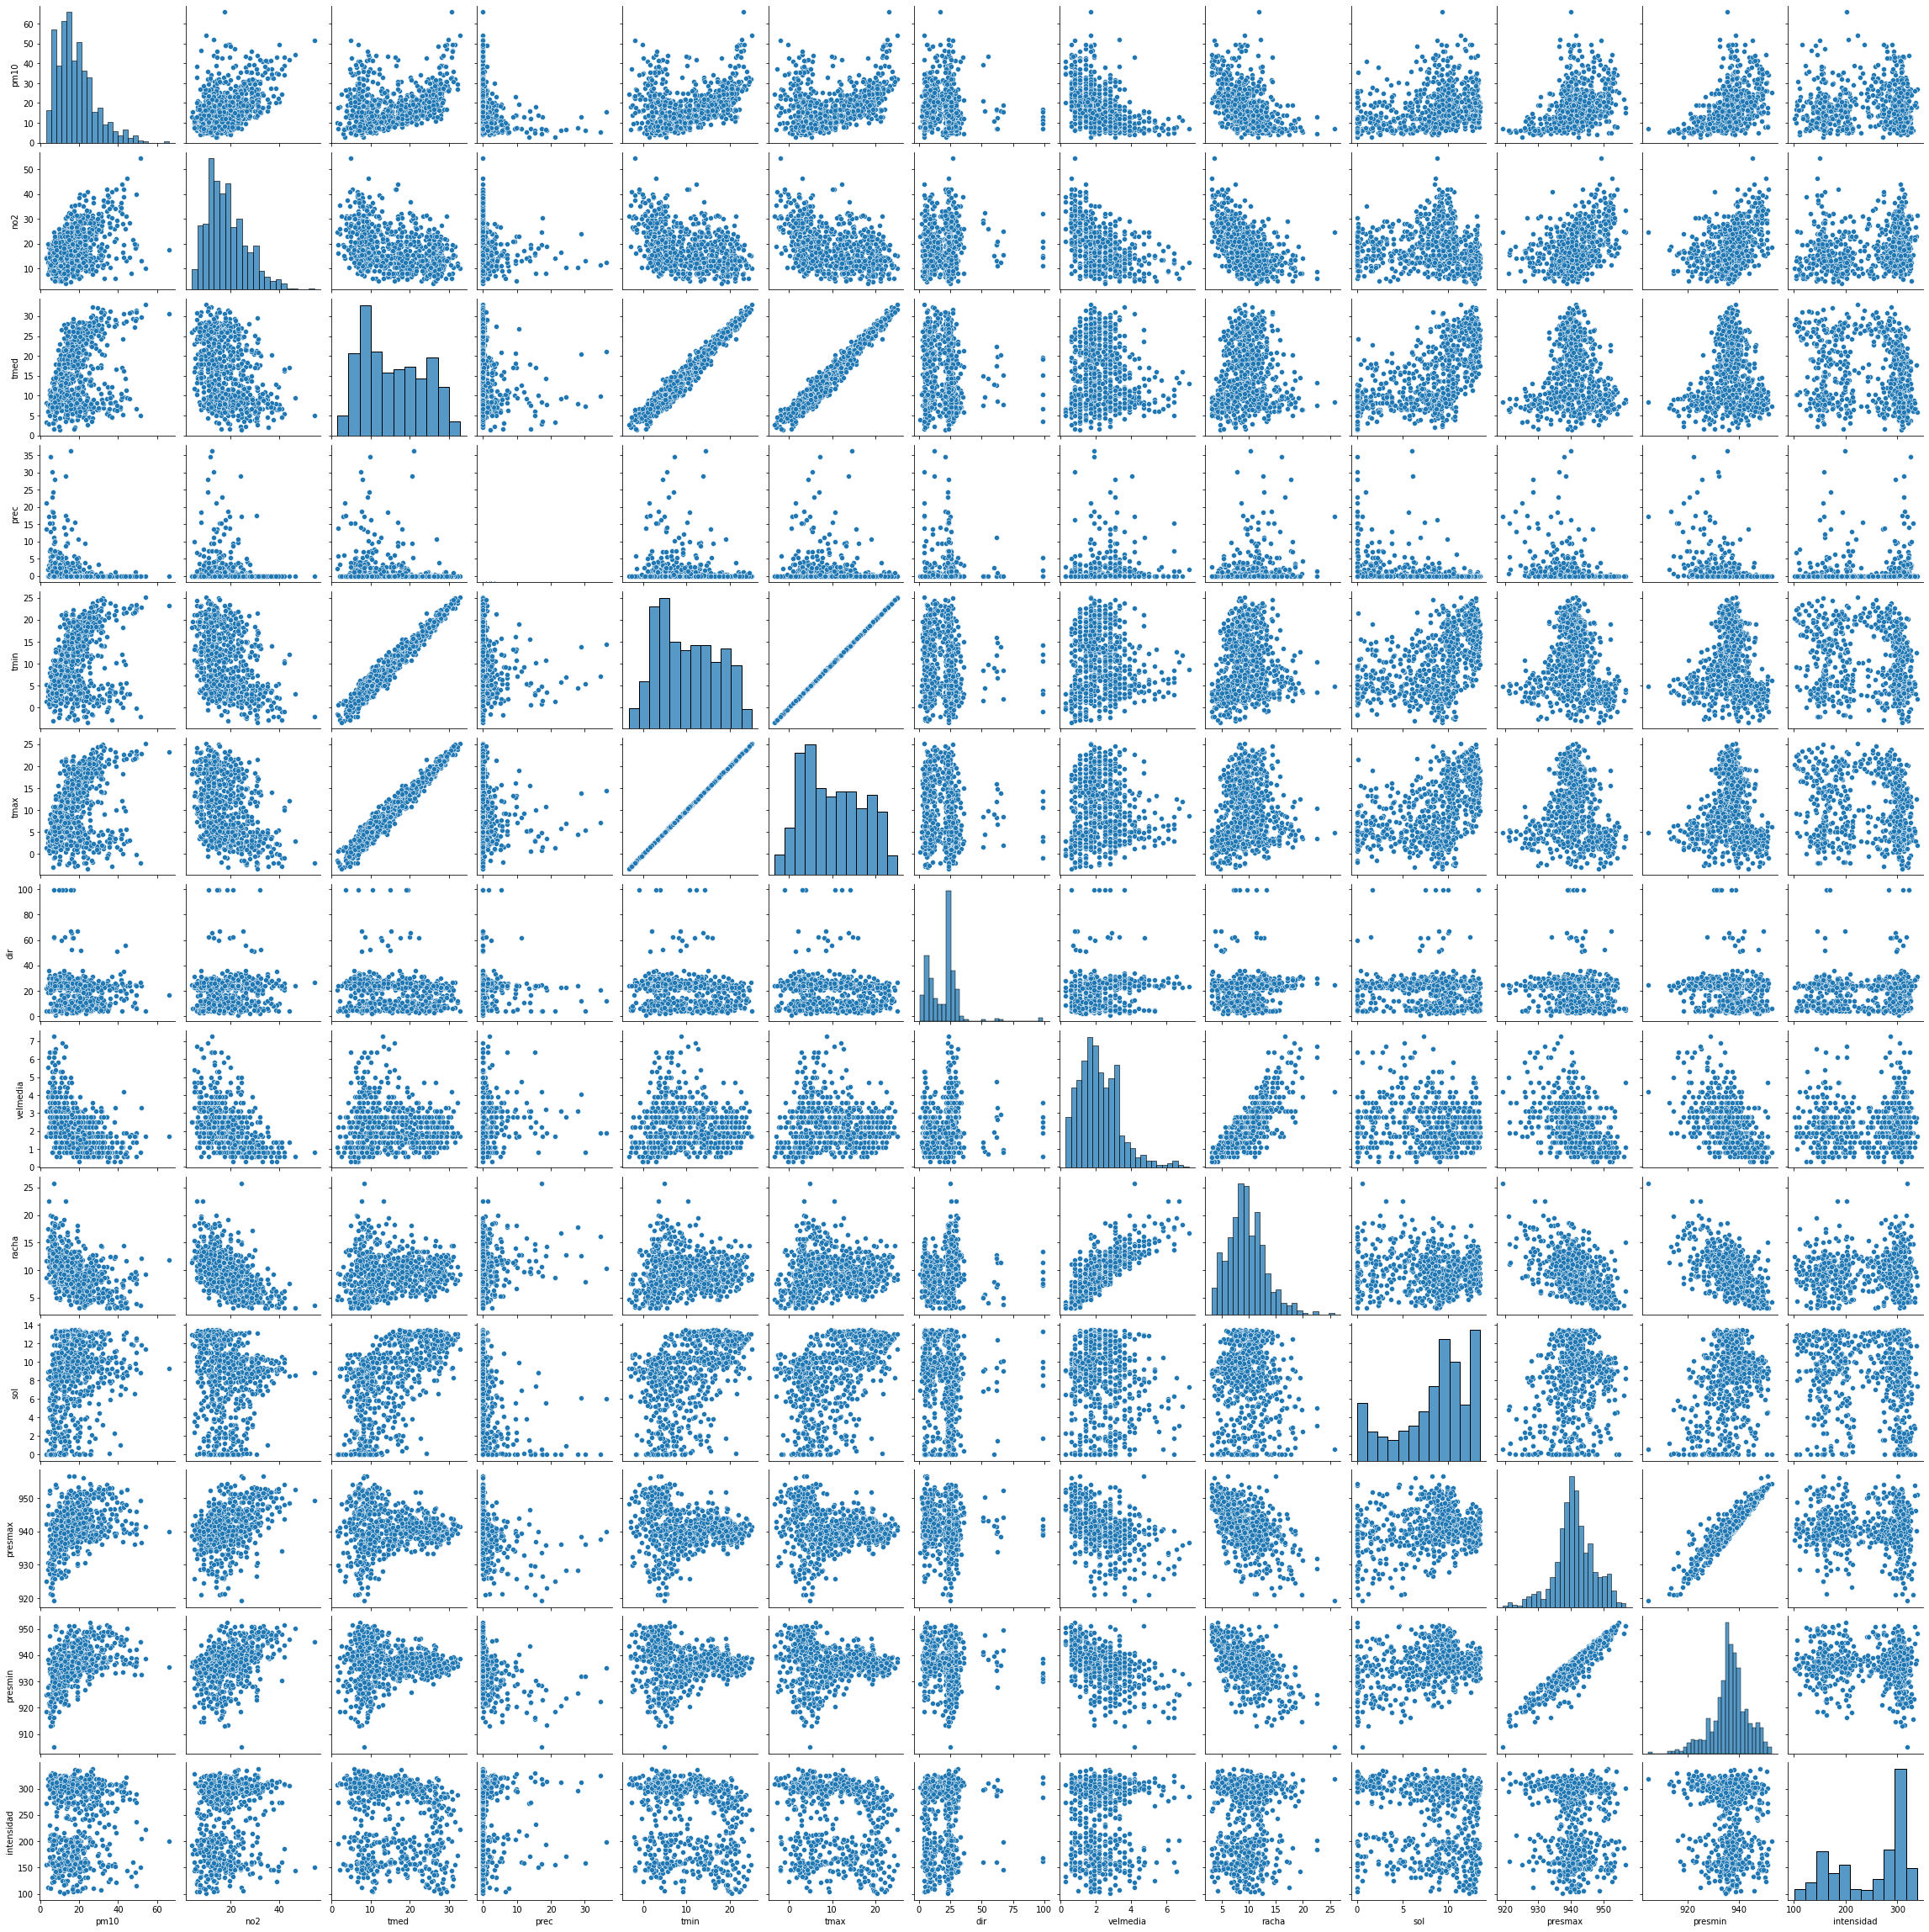

In [18]:
sns.pairplot(dfMergeado[['pm10', 'no2', 'tmed', 'prec', 'tmin', 'tmax', 'dir', 'velmedia','racha', 'sol', 'presmax', 'presmin', 'intensidad']]);

Nos interesa saber si hay algún tipo de relación entre los datos de calidad del aire (2 primeros campos), los de tráfico (el último campo) y los de meteorología (el resto de campos).

Lo que en este gráfico podemos ver es:

1) hay una cierta relación positiva entre PM10 y la TemperaturaMedia. En el caso de NO2, parece haber una pequeña relación negativa. Por tanto, a mayor temperatura hay una tendencia a tener más partículas PM10 y menos NO2.

2) comparando PM10 con Precipitaciones, vemos que con precipitaciones elevadas se dan pocas partículas pm10. Sólo obtenemos valores elevados de pm10 cuando hay poca precipitación. Lo cual era de esperar. 

3) igualmente pasa con NO2 y las precipitaciones, si bien algo menos acusado. 


Hacemos ahora una matriz de correlación y un mapa de correlaciones

In [19]:
dfMergeado[['pm10', 'no2', 'tmed', 'prec', 'tmin', 'tmax', 'dir', 'velmedia','racha', 'sol', 'presmax', 'presmin', 'intensidad']].corr()

,pm10,no2,tmed,prec,tmin,tmax,dir,velmedia,racha,sol,presmax,presmin,intensidad
pm10,1.000000,0.442738,0.366612,-0.249391,0.313699,0.313699,-0.110296,-0.478972,-0.478908,0.295130,0.397303,0.455967,-0.005929
no2,0.442738,1.000000,-0.358585,-0.104806,-0.405569,-0.405569,0.028108,-0.455409,-0.545705,-0.092964,0.427592,0.408686,0.208011
tmed,0.366612,-0.358585,1.000000,-0.182365,0.978378,0.978378,-0.174357,-0.050559,0.050071,0.600496,-0.045733,0.064549,-0.176601
prec,-0.249391,-0.104806,-0.182365,1.000000,-0.121913,-0.121913,0.006471,0.108802,0.226294,-0.447062,-0.334372,-0.387597,0.013314
tmin,0.313699,-0.405569,0.978378,-0.121913,1.000000,1.000000,-0.161484,0.018690,0.107486,0.468428,-0.120814,-0.016981,-0.164614
tmax,0.313699,-0.405569,0.978378,-0.121913,1.000000,1.000000,-0.161484,0.018690,0.107486,0.468428,-0.120814,-0.016981,-0.164614
dir,-0.110296,0.028108,-0.174357,0.006471,-0.161484,-0.161484,1.000000,0.138456,0.088916,-0.117699,-0.092660,-0.126910,0.064773
velmedia,-0.478972,-0.455409,-0.050559,0.108802,0.018690,0.018690,0.138456,1.000000,0.807349,-0.126264,-0.453129,-0.519709,0.041361
racha,-0.478908,-0.545705,0.050071,0.226294,0.107486,0.107486,0.088916,0.807349,1.000000,-0.086437,-0.523561,-0.588707,0.032447
sol,0.295130,-0.092964,0.600496,-0.447062,0.468428,0.468428,-0.117699,-0.126264,-0.086437,1.000000,0.206477,0.287949,-0.110461


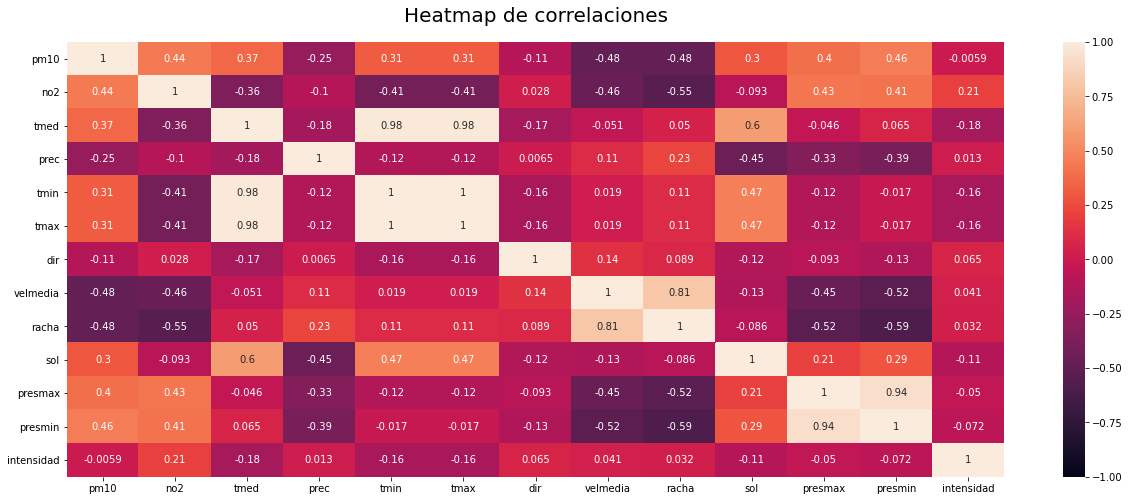

In [20]:
plt.figure(figsize=(21, 8))
heatmap = sns.heatmap(dfMergeado[['pm10', 'no2', 'tmed', 'prec', 'tmin', 'tmax', 'dir', 'velmedia','racha', 'sol', 'presmax', 'presmin', 'intensidad']].corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Heatmap de correlaciones', fontdict={'fontsize':20}, pad=20);

De esta tabla podemos ver lo siguiente:

1) Como vimos antes, hay una pequeña correlación positiva entre PM10 y TMed, y negativa entre NO2 y Tmed. Aunque son correlaciones pequeñas son de las mayores que se dan entre variables de calidad y meteorología.

Las mismas correlaciones se observan, lógicamente, con las temperaturas Tmin y TMax

2) Se ven ahora también unas ciertas correlaciones entre:

- Tanto PM10 como NO2 y VelMedia y racha del viento (negativas)
- Tanto PM10 como NO2 y PresMax y PrexMin (positivas)
- PM10 y Sol (positiva)
- NO2 y Estado del tráfico (positiva)

3) Según esto, por tanto, parece que el tráfico influye sólo un poco en la concentración de NO2, y nada en la de PM10

Analizamos cada variable y sus sesgos

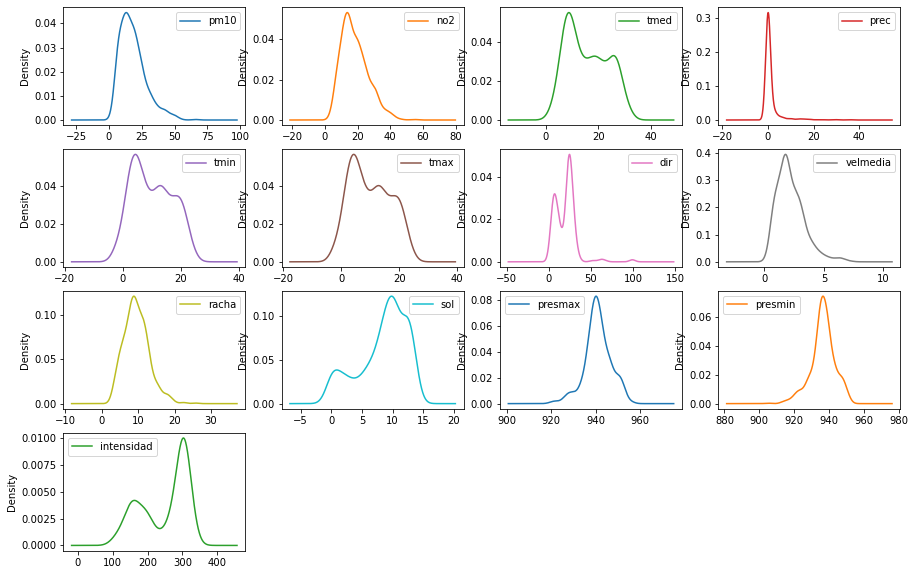

In [21]:
dfMergeado[['pm10', 'no2', 'tmed', 'prec', 'tmin', 'tmax', 'dir', 'velmedia','racha', 'sol', 'presmax', 'presmin', 'intensidad']].plot(kind='density', subplots=True, layout=(4,4), figsize=(15,10), sharex=False);


In [22]:
print(dfMergeado[['pm10', 'no2', 'tmed', 'prec', 'tmin', 'tmax', 'dir', 'velmedia','racha', 'sol', 'presmax', 'presmin', 'intensidad']].skew())

pm10          1.122229
no2           0.787681
tmed          0.273451
prec          5.138789
tmin          0.211913
tmax          0.211913
dir           2.328738
velmedia      1.146313
racha         0.656899
sol          -0.783267
presmax      -0.315820
presmin      -0.563330
intensidad   -0.563396
dtype: float64


Es probable que convenga normalizar las variables. Lo probaremos después en iteraciones de prueba de algoritmos.

Exportamos a un CSV el dataset mergeado sin ninguna transformación, antes de comenzar con la selección de características

In [23]:
dfMergeado.to_csv('DatosMergeadosMadrid.csv')

## Selección de características

Vamos a analizar una posible selección de características de Meteorología con cuatro sistemas distintos, y después escogeremos con cuál quedarnos.

Lo haremos para PM10 y para NO2, comparando los resultados para ambos.

De tráfico sólo disponemos de una variable que mide la intensidad del trafico, por lo que no aplica ninguna reducción.

In [24]:
nombres = ['tmed','prec','dir','velmedia','racha','sol','presmax','presmin']
dfMergeado[['pm10','no2','tmed','prec','dir','velmedia','racha','sol','presmax','presmin']].head()

,pm10,no2,tmed,prec,dir,velmedia,racha,sol,presmax,presmin
fecha,,,,,,,,,,
2018-01-01,8.0,15.0,6.9,0.0,26.0,3.1,10.0,5.9,953.25,950.00
2018-01-02,8.5,18.0,10.4,0.0,29.0,2.8,11.9,7.0,953.25,950.90
2018-01-03,8.0,16.0,10.9,0.0,23.0,1.7,8.6,4.6,954.15,951.05
2018-01-04,5.0,16.5,11.3,0.0,25.0,2.2,7.8,5.8,951.55,942.35
2018-01-05,3.0,14.5,8.2,13.6,22.0,3.1,11.7,1.6,942.35,925.00


In [25]:
## Para Selección univariante
from sklearn.feature_selection import SelectKBest, f_regression

## Para PCA (Análisis de Componentes Principales)
from sklearn.decomposition import PCA

## Para RFE (Eliminación de Características Recursiva)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression #(aunque ya la habíamos importado al principio, para mayor claridad)

## Para importancia de la característica
from sklearn.ensemble import ExtraTreesRegressor


array = dfMergeado[['pm10','no2','tmed','prec','dir','velmedia','racha','sol','presmax','presmin']].values
X = array[:,2:]
Ypm10 = array[:,0]
Yno2 = array[:,1]

### 1.1 Selección univariante - para PM10

In [26]:
# 1.Extracción de 4 características con pruebas estadísticas univariadas 

Y = Ypm10

##  (f_regression para regresión)
test = SelectKBest(score_func=f_regression, k=4)
fit = test.fit(X, Y)

# resumir puntuaciones de ['tmed','prec','dir','velmedia','racha','sol','presmax','presmin']
set_printoptions(precision=3)
print('Puntuaciones de las características')
print(nombres)
print(fit.scores_)
features = fit.transform(X)

# resumen de las 4 características seleccionadas
# [ 'velmedia' , 'racha' , 'presmax', 'presmin' ]
print('\nResumen de valores de las 4 características elegidas')
print(features[0:5,:])

Puntuaciones de las características
['tmed', 'prec', 'dir', 'velmedia', 'racha', 'sol', 'presmax', 'presmin']
[112.884  48.215   8.953 216.438 216.363  69.365 136.266 190.821]

Resumen de valores de las 4 características elegidas
[[  3.1   10.   953.25 950.  ]
 [  2.8   11.9  953.25 950.9 ]
 [  1.7    8.6  954.15 951.05]
 [  2.2    7.8  951.55 942.35]
 [  3.1   11.7  942.35 925.  ]]


Las características elegidas son: [ 'velmedia' , 'racha' , 'presmax', 'presmin' ]

### 1.2 Selección univariante - para NO2

In [27]:
# 1.Extracción de 4 características con pruebas estadísticas univariadas 

Y = Yno2

##  (f_regression para regresión)
test = SelectKBest(score_func=f_regression, k=4)
fit = test.fit(X, Y)

# resumir puntuaciones de ['tmed','prec','dir','velmedia','racha','sol','presmax','presmin']
set_printoptions(precision=3)
print('Puntuaciones de las características')
print(nombres)
print(fit.scores_)
features = fit.transform(X)

# resumen de las características seleccionadas
# ['velmedia' , 'racha' , 'presmax', 'presmin' ]
print('\nResumen de valores de las 4 características elegidas')
print(features[0:5,:])

Puntuaciones de las características
['tmed', 'prec', 'dir', 'velmedia', 'racha', 'sol', 'presmax', 'presmin']
[107.273   8.074   0.575 190.231 308.308   6.338 162.661 145.775]

Resumen de valores de las 4 características elegidas
[[  3.1   10.   953.25 950.  ]
 [  2.8   11.9  953.25 950.9 ]
 [  1.7    8.6  954.15 951.05]
 [  2.2    7.8  951.55 942.35]
 [  3.1   11.7  942.35 925.  ]]


Las características elegidas son: ['velmedia' , 'racha' , 'presmax', 'presmin' ] , las mismas que para el PM10

### 2.1 RFE (Recursive Feature Elimination - Eliminación Recursiva de Características) - PM10

Usaremos RFE con el algoritmo de regresión lineal para seleccionar las 4 características principales. 

In [28]:
# 2.Extracción de características con RFE
## modelo = SVR

Y=Ypm10

modelo = SVR(kernel="linear")
rfe = RFE(modelo, n_features_to_select=4)

fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print(nombres)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 4
['tmed', 'prec', 'dir', 'velmedia', 'racha', 'sol', 'presmax', 'presmin']
Selected Features: [ True False False  True  True False  True False]
Feature Ranking: [1 3 5 1 1 4 1 2]


Las características elegidas son: [ 'tmed' , 'velmedia' , 'racha' ,  'presmax' ]

### 2.2 RFE (Recursive Feature Elimination - Eliminación Recursiva de Características) - NO2

In [29]:
# 2.Extracción de características con RFE
## modelo = SVR

Y=Yno2

modelo = SVR(kernel="linear")
rfe = RFE(modelo, n_features_to_select=4)

fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print(nombres)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 4
['tmed', 'prec', 'dir', 'velmedia', 'racha', 'sol', 'presmax', 'presmin']
Selected Features: [ True False False  True  True False  True False]
Feature Ranking: [1 2 4 1 1 3 1 5]


Las características elegidas son: [ 'tmed' , 'velmedia' , 'racha' , 'presmax' ] , las mismas que para el PM10

### 3 PCA (*Principal Component Analysis* – Análisis de Componente Principal)

El PCA no usa un modelo de algoritmo, es independiente del segmento Y, por lo que su implementación es ya válida tanto para el PM10 como para el NO2

El PCA no selecciona características sino que comprime todas las caractarísticas del segmento X en el número que le digamos (en este caso 4) de nuevas características calculadas.

In [30]:
# 3.Extracción de características con PCA
pca = PCA(n_components=4)
Xtransformed = pca.fit_transform(X)

# Vista resumen de los nuevos componentes
print(Xtransformed)

[[  4.942 -17.443 -10.005   1.432]
 [  7.126 -18.55   -5.9     2.039]
 [  1.132 -18.529  -7.497   3.314]
 ...
 [ -0.216 -16.032  -8.667   0.372]
 [ 44.091 -26.326  -1.834   2.116]
 [ -0.497 -18.947 -10.524   0.806]]


### 4.1 Importancia de Características - PM10

Usamos el modelo de ExtraTreesRegressor para identificar la importancia de las diferentes características

In [31]:
# 4.Extracción de importancia de las características

Y = Ypm10

model = ExtraTreesRegressor()
model.fit(X, Y)
print(nombres)
print(model.feature_importances_)

['tmed', 'prec', 'dir', 'velmedia', 'racha', 'sol', 'presmax', 'presmin']
[0.326 0.022 0.051 0.147 0.18  0.08  0.084 0.11 ]


Seleccionando las 4 características con mayor puntuación, las características elegidas son: [ 'tmed' , 'velmedia' , 'racha', 'presmin' ] 

Identico a lo seleccionado por el sistema de Selección Univariante

### 4.2 Importancia de Características - NO2

In [32]:
# 4.Extracción de importancia de las características

Y = Yno2

model = ExtraTreesRegressor()
model.fit(X, Y)
print(nombres)
print(model.feature_importances_)

['tmed', 'prec', 'dir', 'velmedia', 'racha', 'sol', 'presmax', 'presmin']
[0.126 0.03  0.066 0.156 0.25  0.114 0.132 0.125]


Seleccionando las 4 características con mayor puntuación, las características elegidas son: ['tmed', 'velmedia' , 'racha' , 'presmax' ] 

La tmed obtiene un valor de 0,12 y la presmin de 0,121, ambos valores prácticamente iguales. Hemos preferido seleccionar la tmed al tener ya incluida la presmax, y para asemejar el resultado con el del PM10

**Resumiendo:**

- 1.1 Selección univariante PM10 - [ 'velmedia' , 'racha' , 'presmax', 'presmin' ]
- 1.2 Selección univariante NO2 - [ 'velmedia' , 'racha' , 'presmax', 'presmin' ]
- 2.1 RFE PM10 - [ 'tmed' , 'velmedia' , 'racha' , 'presmax' ]
- 2.2 RFE NO2 - [ 'tmed' , 'velmedia' , 'racha' , 'presmax' ]
- 4.1 Importancia de Características PM10 - [ 'tmed' , 'velmedia' , 'racha', 'presmin' ]
- 4.2 Importancia de Características NO2 - ['tmed', 'velmedia' , 'racha' , 'presmax' ]
 

CONCLUSIÓN: 

- Para la predicción de **PM10** escogeríamos **[ 'tmed' , 'velmedia' , 'racha' , 'presmax' ]** por ser la combinación más puntuada
- Para la predicción de **NO2** escogeríamos **[ 'tmed' , 'velmedia' , 'racha' , 'presmax' ]** por la misma razón, observando que es la misma combinación que para PM10

En caso de usar el sistema PCA, las 4 características serían las calculadas bajo el nombre de Xtransformed. Pero en principio no usaremos este sistema.

Vamos a exportar a un CSV el dataset mergeado con la reducción de características escogido (el mismo válido para ambos contaminantes):

In [33]:
dfMergeadoSelCarac = dfMergeado[['pm10', 'no2', 'tmed', 'velmedia','racha', 'presmax', 'intensidad']]

dfMergeadoSelCarac.to_csv('DatosMergeadosMadrid_ConSeleccionCaract.csv')